# lecture on mesh grid of resaca depth
the mesh grid gives you an array of the x-coordinates and the y-coordinates, if you have a grid:

#  1 2 3 4
# 3
# 2
# 1
the x array:
#1234
#1234
#1234

the y array: 
#3333
#2222
#1111

and the depths at each:
#10,10,10,10,
#10,10,10,10,
#10,10,10,10,


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [2]:
# if I want to change all of my plots:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# note this method changes tick mark font sizes as well

# Warm up exercise:
E1. Plot the height function $H = -100(lat-40)^2 -400{(lon+106)^2} + 8000$ over 38 to 42 N and 108 to 104 W. What mountain range is this a rough approximation to?

In [5]:
#we want a graph over a range of points, 38-42 N and 108 to 104 W
#linspace graphs are the best for this

In [22]:
# use start,stop,step
x = [38, 39, 40, 41, 42]
y = [108, 107, 106, 105, 104]
X = np.linspace(38, 42, 1)
Y = np.linspace(108,104,1)
z =np.linspace(-100(x-40)**2 - 400(y-106)**2 + 8000
               
plt.pcolormesh(X,Y,z) 
plt.colorbar()

SyntaxError: invalid syntax (<ipython-input-22-ce8a5a9743b8>, line 8)

In [23]:
#try again

In [69]:
y = np.linspace(38, 42, 100)
x = np.linspace(-108,-104,100)
X,Y = np.meshgrid(x,y)

In [70]:
H = -100*(X-40)**2 - 400*(Y+106)**2 + 8000
#make sure to put an * to multipy the ()

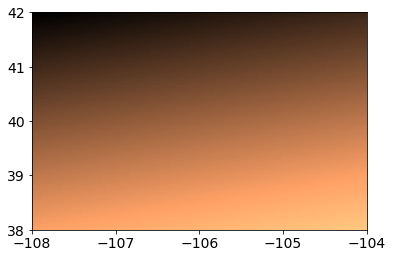

In [71]:
plt.pcolormesh(X, Y, H,cmap = 'copper')

# File I/O
You have learned a number of ways to visualize data, and a few analysis tools. Throughout previous lectures, we have had a few examples of grabbing data files, including text files and netcdf files. To review:
## Text files

In [60]:
# to load a simple text file as a numpy array:
tdata = np.loadtxt('populations.txt')

In [61]:
tdata

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

if we want to save an array as a text file:


In [62]:
np.savetxt('test.txt', tdata)

# Exercises:
#E2. Go look at the file that was just created. Is it is the same as "populations.txt"? If not, how is it different?
#E3. Add a header to this file (see the function documentation) with the names of the variables

In [63]:
E2 = np.loadtxt('test.txt')

In [64]:
E2

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

## E2 Answer: no the files are different if you open them directly, but when I open the array in the notebook they appear the same (the code behind them is just different  Iguess). the original one has a header

# E3
I opened the function documentation and added a header

In [65]:
#open the function documentation
#google numpy savetxt
np.savetxt?

In [67]:
np.savetxt('Downloads/test.txt', tdata, header='year  hare  lynx  carrot' ,fmt='%.4f')


To see a more complicated text file upload, look here: https://scipython.com/book/chapter-6-numpy/examples/using-numpys-loadtxt-method/

## Netcdf files

In [68]:
# to load a netcdf file as an xarray dataset and convert to numpy arrays:
file = '/Users/abigailpozulp/Downloads/CESM.003.SST.1980.nc'
data = xr.open_dataset(file)

In [69]:
# note data is an xarray dataset, which gives you a bunch of "metadata" about what is in the netcdf file
data

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 1980-12-31
Data variables:
    SST      (time, lat, lon) float32 ...

In [78]:
# extract variables from the above netcdf file
lat = np.array(data.lat)
#lat
lon = np.array(data.lon)
# monthly sea surface temperature anamoly
sst = np.array(data.SST)

Interrogating the dataset will give us more detailed information about each variable or coordinate
In [ ]:
data.lon

In [70]:
data.lon

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

## There are many other types of data, and often a number of packages that can be used to open the same type of data files. For example, xarray is built on top of the netCDF4 package

In [71]:
# need a package to deal with netcdf files
import netCDF4 as nc

In [72]:
# open the same file as above with netCDF4
data2 = nc.Dataset(file, 'r')
data2
# this is a netcdf4 dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(360), lat(180), time(12)
    variables(dimensions): float64 lon(lon), float64 lat(lat), int64 time(time), float32 SST(time,lat,lon)
    groups: 

In [73]:
data2.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  _FillValue: nan
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (360,)
              filling on), ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  _FillValue: nan
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (180,)
              filling on), ('time', <class 'netCDF4._netCDF4.Variable'>
              int64 time(time)
                  units: days since 1970-01-31
                  calendar: proleptic_gregorian
              unlimited dimensions: 
              current shape = (12,)
              filling on, defaul

In [74]:
data2.dimensions


OrderedDict([('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180),
             ('time',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 12)])


To get out a variable we have to do a little more work than with xarray

In [75]:
sst2 = data2.variables['SST'][:]

# Exercises:
#E4. What type of object is "sst2"? Is it different from "sst" we got with xarray and numpy? How?
#E5. Make sst2 like sst. Hint, this involves masking

# E4 
What type of object is sst2, is it different than SST, how?

In [93]:
sst

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.801011 , -1.8009781, -1.8009448, ..., -1.8011017,
         -1.8010732, -1.8010437],
        [-1.8005607, -1.8005456, -1.8005308, ..., -1.8006089,
         -1.8005923, -1.8005762],
        [-1.8000543, -1.8000516, -1.800049 , ..., -1.800063 ,
         -1.80006  , -1.8000572]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8003076, -1.8002812, -1.8002526, ..., -1.800377 ,
         -1.8003554, -1.8003322],
        [-1.

In [94]:
sst2

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8010109663009644, -1.8009780645370483, -1.8009448051452637,
          ..., -1.8011016845703125, -1.8010731935501099,
          -1.8010437488555908],
         [-1.800560712814331, -1.800545573234558, -1.8005307912826538,
          ..., -1.8006088733673096, -1.800592303276062,
          -1.8005762100219727],
         [-1.8000543117523193, -1.8000515699386597, -1.8000489473342896,
          ..., -1.8000630140304565, -1.8000600337982178,
          -1.8000571727752686]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8003076314926147, -1.8002811670303345, -1.8002525568008423,
          ..., -1.8003770112991333, -1.8003554344177246,
          -1.8003321886062622],
         [-1.8003292083740234, -1.800324559211731, -1.8003203868865967,

In [95]:
#they have the same dimensions but different values in the array

In [79]:
type(sst)

numpy.ndarray

In [80]:
type(sst2)

numpy.ma.core.MaskedArray

# E4 Answer: 
### yes they are DIFFERENT TYPES...sst is an array, while sst2 is a masked array.

# E5 
### make sst like sst2
everywhere SST is nan we want to apply a mask 
numpy.ma.masked_where(SST = nan)

In [86]:
#they are already the same dimensions
sst2.shape

(12, 180, 360)

In [88]:
sst_like_sst2 = np.ma.masked_where(sst == np.nan,sst)

In [97]:
sst_like_sst2 = np.ma.masked_invalid(sst)

In [98]:
sst_like_sst2

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8010109663009644, -1.8009780645370483, -1.8009448051452637,
          ..., -1.8011016845703125, -1.8010731935501099,
          -1.8010437488555908],
         [-1.800560712814331, -1.800545573234558, -1.8005307912826538,
          ..., -1.8006088733673096, -1.800592303276062,
          -1.8005762100219727],
         [-1.8000543117523193, -1.8000515699386597, -1.8000489473342896,
          ..., -1.8000630140304565, -1.8000600337982178,
          -1.8000571727752686]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8003076314926147, -1.8002811670303345, -1.8002525568008423,
          ..., -1.8003770112991333, -1.8003554344177246,
          -1.8003321886062622],
         [-1.8003292083740234, -1.800324559211731, -1.8003203868865967,

In [102]:
True or False(sst2 = sst_like_sst2)

True

In [103]:
type(sst_like_sst2)

numpy.ma.core.MaskedArray

# E5. Answer
#### I used masking to make sst like sst2, the masked sst is named sst_like_sst2
#### I tested whether they were alike by asking the program "True or False"
#### I also asked for the "type" of sst_like_sst2. And it is a Masked Array just like sst2

In [154]:
import numpy.ma as ma

# Spreadsheets
Many of your data sets will be in excel files. We have been using xarray for netcdf files, and you have just seen that this gave you consise and useful information about the content of the netcdf file. Xarray is built on pandas, which works similarly for spreadsheets.

In [4]:
import pandas as pd


Download this data file:
https://www.dataquest.io/blog/large_files/movies.xls

In [15]:
file = "/Users/abigailpozulp/Downloads/movies.xls"
movies = pd.read_excel(file)

In [16]:
help(movies)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-l


Note this is a pandas dataframe

In [19]:
# you can change this to an xarray dataset if you like
# http://xarray.pydata.org/en/stable/pandas.html
movies2 = xr.Dataset.from_dataframe(movies)

In [161]:
movies2

<xarray.Dataset>
Dimensions:                      (index: 1338)
Coordinates:
  * index                        (index) int64 0 1 2 3 4 ... 1334 1335 1336 1337
Data variables:
    Title                        (index) object "Intolerance: Love's Struggle Throughout the Ages\xa0" ... 'Wing Commander\xa0'
    Year                         (index) int64 1916 1920 1925 ... 1999 1999 1999
    Genres                       (index) object 'Drama|History|War' ... 'Action|Adventure|Sci-Fi'
    Language                     (index) object nan nan ... 'English' 'English'
    Country                      (index) object 'USA' 'USA' ... 'USA' 'USA'
    Content Rating               (index) object 'Not Rated' nan ... 'PG-13'
    Duration                     (index) int64 123 110 151 145 ... 106 106 100
    Aspect Ratio                 (index) float64 1.33 1.33 1.33 ... 1.85 2.35
    Budget                       (index) float64 3.859e+05 1e+05 ... 3e+07
    Gross Earnings               (index) float64 nan 3e

In [20]:
movies.Year
# note we only have the first sheet in the file loaded (1900s)
# the tutorial will go over how to add the other sheets

0       1916
1       1920
2       1925
3       1927
4       1929
5       1929
6       1930
7       1932
8       1933
9       1933
10      1934
11      1935
12      1936
13      1936
14      1937
15      1937
16      1938
17      1938
18      1939
19      1939
20      1939
21      1940
22      1940
23      1940
24      1940
25      1940
26      1941
27      1942
28      1942
29      1943
        ... 
1308    1999
1309    1999
1310    1999
1311    1999
1312    1999
1313    1999
1314    1999
1315    1999
1316    1999
1317    1999
1318    1999
1319    1999
1320    1999
1321    1999
1322    1999
1323    1999
1324    1999
1325    1999
1326    1999
1327    1999
1328    1999
1329    1999
1330    1999
1331    1999
1332    1999
1333    1999
1334    1999
1335    1999
1336    1999
1337    1999
Name: Year, Length: 1338, dtype: int64

# Exercises:
Ex 6 (rest of lab). Go through this tutorial on excel and pandas
https://www.dataquest.io/blog/excel-and-pandas/

In [10]:
import xlrd 
import xlwt
import xlsxwriter

In [12]:
import pandas as pd

#### Pandas has a built-in DataFrame.head() method that we can use to easily display the first few rows of our DataFrame. If no argument is passed, it will display first five rows. If a number is passed, it will display the equal number of rows from the top.
#movies.head()

In [11]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


Excel files quite often have multiple sheets and the ability to read a specific sheet or all of them is very important. To make this easy, the pandas read_excel method takes an argument called sheetname that tells pandas which sheet to read in the data from. For this, you can either use the sheet name or the sheet number. Sheet numbers start with zero. If the sheetname argument is not given, it defaults to zero and pandas will import the first sheet.

By default, pandas will automatically assign a numeric index or row label starting with zero. You may want to leave the default index as such if your data doesn't have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting index_col property to a column. It takes a numeric value for setting a single column as index or a list of numeric values for creating a multi-index.



In [30]:
#set title as the index column because it is the 0th column...index_col=0
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet1.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [31]:
#naming the other two sheets in panda
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)

Since all the three sheets have similar data but for different records\movies, we will create a single DataFrame from all the three DataFrames we created above. We will use the pandas concat method for this and pass in the names of the three DataFrames we just created and assign the results to a new DataFrame object, movies. By keeping the DataFrame name same as before, we are over-writing the previously created DataFrame.

In [33]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

#Check the number of rows in the combined DataFrame by calling the method shape
movies.shape

(5042, 24)

#### Exploring the data
Now that we have read in the movies data set from our Excel file, we can start exploring it using pandas. A pandas DataFrame stores the data in a tabular format, just like the way Excel displays the data in a sheet. Pandas has a lot of built-in methods to explore the DataFrame we created from the Excel file we just read in.

In [36]:
# We can use the tail method to view the bottom rows. 
# If no parameter is passed, only the bottom five rows are returned.
movies.tail()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7
Yu-Gi-Oh! Duel Monsters,NaN,Action|Adventure|Animation|Family|Fantasy,Japanese,Japan,NaN,24.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0,124,0.0,12417,51.0,6.0,7.0


n Excel, you're able to sort a sheet based on the values in one or more columns. In pandas, you can do the same thing with the sort_values method. For example, let's sort our movies DataFrame based on the Gross Earnings column.



In [39]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

# Since we have the data sorted by values in a column, we can do few interesting things with it. 
#For example, we can display the top 10 movies by Gross Earnings.

sorted_by_gross["Gross Earnings"].head(10)

Title
Avatar                                        760505847.0
Titanic                                       658672302.0
Jurassic World                                652177271.0
The Avengers                                  623279547.0
The Avengers                                  623279547.0
The Dark Knight                               533316061.0
Star Wars: Episode I - The Phantom Menace     474544677.0
Star Wars: Episode IV - A New Hope            460935665.0
Avengers: Age of Ultron                       458991599.0
The Dark Knight Rises                         448130642.0
Name: Gross Earnings, dtype: float64

We can also create a plot for the top 10 movies by Gross Earnings. Pandas makes it easy to visualize your data with plots and charts through matplotlib, a popular data visualization library. With a couple lines of code, you can start plotting. Moreover, matplotlib plots work well inside Jupyter Notebooks since you can displace the plots right under the code.

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

We will draw a bar plot where each bar will represent one of the top 10 movies. We can do this by calling the plot method and setting the argument kind to barh. This tells matplotlib to draw a horizontal bar plot.

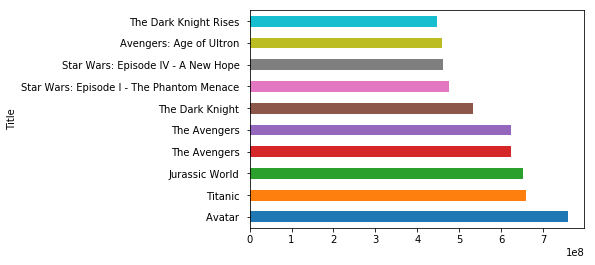

In [41]:
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")
plt.show()

Let's create a histogram of IMDB Scores to check the distribution of IMDB Scores across all movies. Histograms are a good way to visualize the distribution of a data set. We use the plot method on the IMDB Scores series from our movies DataFrame and pass it the argument kind="hist".



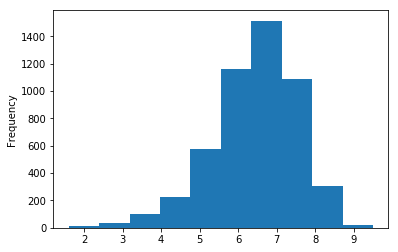

In [44]:
movies['IMDB Score'].plot(kind="hist")
plt.show()

# This data visualization suggests that most of the IMDB Scores fall between six and eight.

#### Getting statistical information about the data
Pandas has some very handy methods to look at the statistical data about our data set. For example, we can use the describe method to get a statistical summary of the data set. Count, mean, Standard Deviation, Min/Max, and percent quartiles

#Please note that this information will be calculated only for the numeric values.



In [45]:
movies.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
count,4935.000000,5028.000000,4714.000000,4.551000e+03,4.159000e+03,4938.000000,5035.000000,5029.000000,5020.000000,5042.000000,5042.000000,5029.000000,5.042000e+03,5022.000000,4993.000000,5042.000000
mean,2002.470517,107.201074,2.220403,3.975262e+07,4.846841e+07,686.621709,6561.323932,1652.080533,645.009761,9700.959143,7527.457160,1.371446,8.368475e+04,272.770808,140.194272,6.442007
std,12.474599,25.197441,1.385113,2.061149e+08,6.845299e+07,2813.602405,15021.977635,4042.774685,1665.041728,18165.101925,19322.070537,2.013683,1.384940e+05,377.982886,121.601675,1.125189
min,1916.000000,7.000000,1.180000,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,1.600000
25%,1999.000000,93.000000,1.850000,6.000000e+06,5.340988e+06,7.000000,614.500000,281.000000,133.000000,1411.250000,0.000000,0.000000,8.599250e+03,65.000000,50.000000,5.800000
50%,2005.000000,103.000000,2.350000,2.000000e+07,2.551750e+07,49.000000,988.000000,595.000000,371.500000,3091.000000,166.000000,1.000000,3.437100e+04,156.000000,110.000000,6.600000
75%,2011.000000,118.000000,2.350000,4.500000e+07,6.230944e+07,194.750000,11000.000000,918.000000,636.000000,13758.750000,3000.000000,2.000000,9.634700e+04,326.000000,195.000000,7.200000
max,2016.000000,511.000000,16.000000,1.221550e+10,7.605058e+08,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,43.000000,1.689764e+06,5060.000000,813.000000,9.500000


In [46]:
#We can also use the corresponding method to access this information one at a time. 
#For example, to get the mean of a particular column, you can use the mean method on that column.

movies["Gross Earnings"].mean()



48468407.52680933

#### Applying formulas on the columns
One of the much-used features of Excel is to apply formulas to create new columns from existing column values. In our Excel file, we have Gross Earnings and Budget columns. We can get Net earnings by subtracting Budget from Gross earnings. We could then apply this formula in the Excel file to all the rows. We can do this in pandas also as shown below.

It's worth noting the difference here in how formulas are treated in Excel versus pandas. In Excel, a formula lives in the cell and updates when the data changes - with Python, the calculations happen and the values are stored - if Gross Earnings for one movie was manually changed, Net Earnings won't be updated.


In [47]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]

#Above, we used pandas to create a new column called Net Earnings
#and populated it with the difference of Gross Earnings and Budget. 

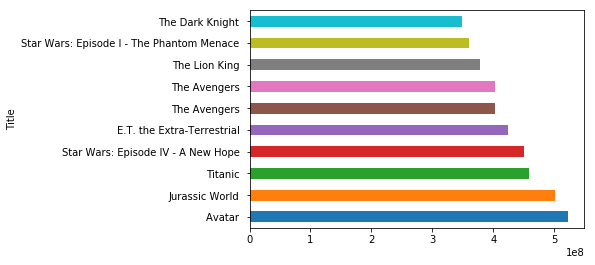

In [48]:
#Let's use the sot_values method to sort the data by the new column we created
#and visualize the top 10 movies by Net Earnings.

sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=[False])
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()

#### Pivot Table in pandas
Advanced Excel users also often use pivot tables. A pivot table summarizes the data of another table by grouping the data on an index and applying operations such as sorting, summing, or averaging. You can use this feature in pandas too.

We need to first identify the column or columns that will serve as the index, and the column(s) on which the summarizing formula will be applied.

In [50]:
#Let's start small, by choosing Year as the index column and Gross Earnings as the summarization column
#and creating a separate DataFrame from this data

movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()

,Year,Gross Earnings
Title,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,NaN
Over the Hill to the Poorhouse,1920.0,3000000.0
The Big Parade,1925.0,NaN
Metropolis,1927.0,26435.0
Pandora's Box,1929.0,9950.0


In [51]:
#We now call pivot_table on this subset of data. 
#The method pivot_table takes a parameter index. As mentioned, we want to use Year as the index.

earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


This gave us a pivot table with grouping on Year and summarization on the sum of Gross Earnings. Notice, we didn't need to specify Gross Earnings column explicitly as pandas automatically identified it the values on which summarization should be applied.

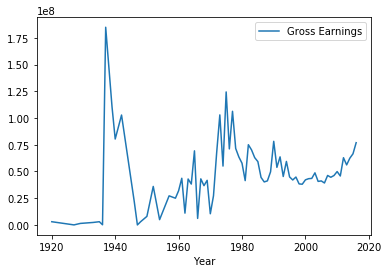

In [52]:
# We can use this pivot table to create some data visualizations. 
#We can call the plot method on the DataFrame to create a line plot 
# and call the show method to display the plot in the notebook.

earnings_by_year.plot()
plt.show()

We saw how to pivot with a single column as the index. Things will get more interesting if we can use multiple columns. Let's create another DataFrame subset but this time we will choose the columns, Country, Language and Gross Earnings.



In [53]:
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()

,Country,Language,Gross Earnings
Title,,,
Intolerance: Love's Struggle Throughout the Ages,USA,NaN,NaN
Over the Hill to the Poorhouse,USA,NaN,3000000.0
The Big Parade,USA,NaN,NaN
Metropolis,Germany,German,26435.0
Pandora's Box,Germany,German,9950.0


In [54]:
#We will use columns Country and Language as the index for the pivot table. 
#We will use Gross Earnings as summarization table, 
#however, we do not need to specify this explicitly as we saw earlier.

earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()

Gross Earnings
Country     Language                  
Afghanistan Dari          1.127331e+06
Argentina   Spanish       7.230936e+06
Aruba       English       1.007614e+07
Australia   Aboriginal    6.165429e+06
            Dzongkha      5.052950e+05

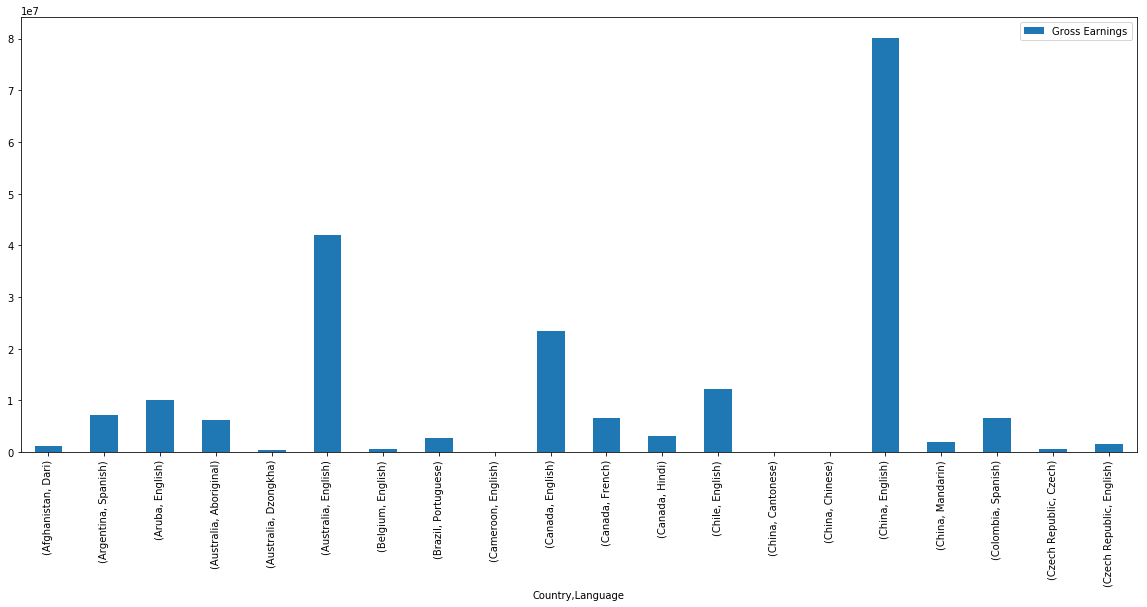

In [55]:
#Let's visualize this pivot table with a bar plot. 
#Since there are still few hundred records in this pivot table, we will plot just a few of them.

earnings_by_co_lang.head(20).plot(kind='bar', figsize=(20,8))
plt.show()